# Лабабаторная работа № 7: Признаки

Используйте наборы данных для классификации и регрессии, с помощью которых вы выполняли ЛР1-ЛР4.

In [444]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectKBest, RFE
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE, Isomap
from sklearn.cluster import KMeans

In [104]:
X_csv = pd.read_csv("../data/classification/airlines_task.csv")
X_csv

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,400740,XE,3036,IAH,CHS,4.0,1195,131.0,0
1,194808,UA,315,DEN,ONT,7.0,707,145.0,0
2,526903,OO,6673,SFO,MRY,5.0,499,42.0,1
3,477937,WN,3668,PHX,ONT,2.0,810,70.0,1
4,48180,AS,623,LAS,PDX,5.0,985,143.0,0
...,...,...,...,...,...,...,...,...,...
399995,488611,AA,1533,ATL,DFW,3.0,415,150.0,0
399996,188847,US,486,RNO,PHX,7.0,365,107.0,0
399997,437638,OO,3111,CAK,MKE,7.0,640,84.0,0
399998,98020,AA,623,BWI,DFW,1.0,1000,220.0,0


In [105]:
X_csv = X_csv.drop_duplicates()
X_csv = X_csv.drop(["id"], axis=1)
X_csv.isna().sum()

Airline         736
Flight            0
AirportFrom       0
AirportTo      1157
DayOfWeek       327
Time              0
Length          483
Delay             0
dtype: int64

In [106]:
X_csv['Airline'] = X_csv['Airline'].fillna(X_csv['Airline'].mode()[0])
X_csv['AirportTo'] = X_csv['AirportTo'].fillna(X_csv['AirportTo'].mode()[0])
X_csv['Length'] = X_csv['Length'].fillna(X_csv['Length'].mean())
X_csv['DayOfWeek'] = X_csv['DayOfWeek'].fillna(X_csv['DayOfWeek'].mean())

In [107]:
X_csv.isna().sum()

Airline        0
Flight         0
AirportFrom    0
AirportTo      0
DayOfWeek      0
Time           0
Length         0
Delay          0
dtype: int64

In [108]:
X_csv[X_csv["Delay"]==1]["Delay"].sum()

100881

In [109]:
from sklearn.utils import resample


delay = X_csv[X_csv["Delay"]!=0]
undelay = X_csv[X_csv["Delay"]==0]
delay = resample(delay,
             replace=True,
             n_samples=300000,
             random_state=42)
data = pd.concat([delay, undelay])
print(data[data["Delay"]==1]["Delay"].sum())
print(data.shape[0] - data[data["Delay"]==1]["Delay"].sum())

300000
299119


In [110]:
cat_features = ['Airline', 'AirportFrom','AirportTo']
prefixes = ['AL', 'AF', 'AT']
X_csv = pd.get_dummies(columns=cat_features, data=data, prefix=prefixes)
X_csv

,Flight,DayOfWeek,Time,Length,Delay,AL_9E,AL_AA,AL_AS,AL_B6,AL_CO,...,AT_TXK,AT_TYR,AT_TYS,AT_UTM,AT_VLD,AT_VPS,AT_WRG,AT_XNA,AT_YAK,AT_YUM
62515,2716,4.0,1056,169.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3450,5175,3.0,940,75.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
304785,1006,4.0,560,70.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
217778,1015,4.0,430,190.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
24804,1094,1.0,1135,165.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399993,6474,6.0,652,138.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399995,1533,3.0,415,150.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399996,486,7.0,365,107.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
399997,3111,7.0,640,84.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [111]:
X_csv.describe()

,Flight,DayOfWeek,Time,Length,Delay,AL_9E,AL_AA,AL_AS,AL_B6,AL_CO,...,AT_TXK,AT_TYR,AT_TYS,AT_UTM,AT_VLD,AT_VPS,AT_WRG,AT_XNA,AT_YAK,AT_YUM
count,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.00000,599119.000000,...,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000
mean,2397.382311,3.930085,809.864239,132.477723,0.500735,0.037018,0.084149,0.020263,0.03423,0.041928,...,0.000162,0.000107,0.002197,0.000043,0.000142,0.001133,0.000103,0.001970,0.000095,0.000603
std,2054.037804,1.781096,280.162518,69.956045,0.500000,0.188805,0.277611,0.140899,0.18182,0.200425,...,0.012723,0.010335,0.046816,0.006588,0.011910,0.033646,0.010172,0.044336,0.009754,0.024540
min,1.000000,1.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,697.000000,3.000000,570.000000,82.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1784.000000,4.000000,809.000000,115.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3675.000000,5.000000,1045.000000,163.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,7813.000000,7.000000,1439.000000,655.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X_csv.drop(["Delay"], axis=1), X_csv["Delay"], test_size=0.2, random_state=42, shuffle=True)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((479295, 608), (479295,), (119824, 608), (119824,))

In [113]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [114]:
X_train

array([[0.05043523, 0.16666667, 0.82575227, ..., 0.        , 0.        ,
        0.        ],
       [0.01292883, 0.33333333, 0.5423373 , ..., 0.        , 0.        ,
        0.        ],
       [0.13261649, 0.5       , 0.64030791, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.59472606, 0.5       , 0.48285514, ..., 0.        , 0.        ,
        0.        ],
       [0.02368152, 1.        , 0.30790763, ..., 0.        , 0.        ,
        0.        ],
       [0.4500768 , 0.        , 0.5213436 , ..., 0.        , 0.        ,
        0.        ]])

In [115]:
X_train = pd.DataFrame(X_train, columns=(X_csv.drop(["Delay"], axis=1)).columns)
X_test = pd.DataFrame(X_test, columns=(X_csv.drop(["Delay"], axis=1)).columns)
y_train = pd.DataFrame(y_train, columns=(["Delay"]))
y_test = pd.DataFrame(y_test, columns=(["Delay"]))
X_train

,Flight,DayOfWeek,Time,Length,AL_9E,AL_AA,AL_AS,AL_B6,AL_CO,AL_DL,...,AT_TXK,AT_TYR,AT_TYS,AT_UTM,AT_VLD,AT_VPS,AT_WRG,AT_XNA,AT_YAK,AT_YUM
0,0.050435,0.166667,0.825752,0.083969,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.012929,0.333333,0.542337,0.274809,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.132616,0.500000,0.640308,0.106870,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.004992,0.333333,0.664801,0.091603,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.003456,0.166667,0.759272,0.114504,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479290,0.026626,1.000000,0.895731,0.421374,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479291,0.073733,0.333333,0.531840,0.114504,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479292,0.594726,0.500000,0.482855,0.145038,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
479293,0.023682,1.000000,0.307908,0.129771,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [116]:
X_train.to_csv("../data/classification/X_train_c.csv")
X_test.to_csv("../data/classification/X_test_c.csv")
y_train.to_csv("../data/classification/y_train_c.csv")
y_test.to_csv("../data/classification/y_test_c.csv")

In [117]:
X_train_c = pd.read_csv("../data/classification/X_train_c.csv")
X_test_c = pd.read_csv("../data/classification/X_test_c.csv")
y_train_c = pd.read_csv("../data/classification/y_train_c.csv")
y_test_c = pd.read_csv("../data/classification/y_test_c.csv")
X_train_r = pd.read_csv("../data/regression/X_train_r.csv")
X_test_r = pd.read_csv("../data/regression/X_test_r.csv")
y_train_r = pd.read_csv("../data/regression/y_train_r.csv")
y_test_r = pd.read_csv("../data/regression/y_test_r.csv")
X_train_c.drop(columns = ["Unnamed: 0"], inplace=True)
X_test_c.drop(columns = ["Unnamed: 0"], inplace=True)
y_train_c.drop(columns = ["Unnamed: 0"], inplace=True)
y_test_c.drop(columns = ["Unnamed: 0"], inplace=True)
X_train_r.drop(columns = ["Unnamed: 0"], inplace=True)
X_test_r.drop(columns = ["Unnamed: 0"], inplace=True)
y_train_r.drop(columns = ["Unnamed: 0"], inplace=True)
y_test_r.drop(columns = ["Unnamed: 0"], inplace=True)

С помощью классов библиотеки sklearn выполните понижение размерности (размерность выберите сами, можно разные) с использованием всех описанных методов (VarianceThreshold, SelectKBest, RFE, PCA, tSNE, Isomap).

In [118]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
from sklearn.metrics import classification_report, r2_score
from sklearn.model_selection import train_test_split


def test(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingRegressor().fit(X_train, y_train)
  print(r2_score(y_test, bag.predict(X_test)))
  
def test2(X, y):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
  bag = BaggingClassifier().fit(X_train, y_train)
  print(classification_report(y_test, bag.predict(X_test)))

In [119]:
X_c = pd.concat([X_train_c, X_test_c])
X_r = pd.concat([X_train_r, X_test_r])
y_c = pd.concat([y_train_c, y_test_c])
y_r = pd.concat([y_train_r, y_test_r])

In [5]:
X_r.describe()

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
count,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,...,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000,53794.000000
mean,-0.002715,-0.000519,-0.000377,-0.001439,-0.001608,-0.000803,0.001428,0.001197,0.002768,-0.004551,...,-0.000496,0.000376,-0.001389,0.001197,-0.002894,0.001670,0.001153,-0.001819,0.001073,0.002219
std,0.994547,1.002364,1.000399,0.996023,0.990244,1.011488,1.003975,1.001714,1.000582,0.997472,...,0.999351,1.000767,0.994229,1.003135,0.998274,1.001478,1.001130,0.998828,1.001856,1.003104
min,-1.258593,-13.142891,-6.475736,-5.095085,-4.977649,-5.077650,-0.174238,-0.315593,-0.813259,-0.588987,...,-0.334558,-0.234216,-0.118808,-0.184588,-0.567341,-0.451714,-0.422063,-0.543593,-0.269103,-0.320862
25%,-0.838412,-0.524922,-0.653420,-0.909049,-0.882038,-0.902793,-0.174238,-0.315593,-0.813259,-0.588987,...,-0.334558,-0.234216,-0.118808,-0.184588,-0.567341,-0.451714,-0.422063,-0.543593,-0.269103,-0.320862
50%,-0.208141,0.035877,-0.205550,-0.029181,-0.023000,-0.013304,-0.174238,-0.315593,-0.813259,-0.588987,...,-0.334558,-0.234216,-0.118808,-0.184588,-0.567341,-0.451714,-0.422063,-0.543593,-0.269103,-0.320862
75%,0.506165,0.526575,0.690191,0.717373,0.697203,0.704025,-0.174238,-0.315593,1.229620,1.697829,...,-0.334558,-0.234216,-0.118808,-0.184588,-0.567341,-0.451714,-0.422063,-0.543593,-0.269103,-0.320862
max,8.846749,12.093047,16.813526,4.450144,46.130726,40.544497,5.739275,3.168640,1.229620,1.697829,...,2.989015,4.269569,8.416932,5.417479,1.762607,2.213789,2.369314,1.839611,3.716048,3.116604


In [120]:
vt = VarianceThreshold(1.01)
X_r_vt = vt.fit_transform(X_r)
print(X_r_vt.shape)
test(X_r_vt, y_r)

(53794, 2)
0.862924500018875


c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


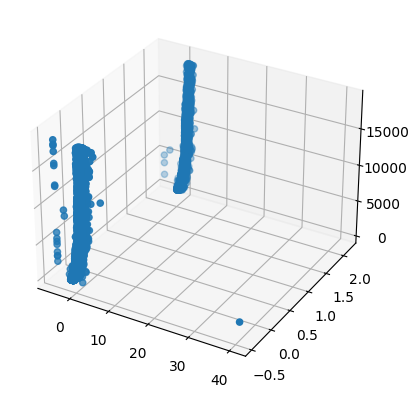

In [135]:
from matplotlib import pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X_r_vt[:,0], X_r_vt[:,1], y_r);

In [121]:
X_c.describe()

,Flight,DayOfWeek,Time,Length,AL_9E,AL_AA,AL_AS,AL_B6,AL_CO,AL_DL,...,AT_TXK,AT_TYR,AT_TYS,AT_UTM,AT_VLD,AT_VPS,AT_WRG,AT_XNA,AT_YAK,AT_YUM
count,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.00000,599119.000000,599119.000000,...,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000,599119.000000
mean,0.306757,0.488348,0.559737,0.202256,0.037018,0.084149,0.020263,0.03423,0.041928,0.110042,...,0.000162,0.000107,0.002197,0.000043,0.000142,0.001133,0.000103,0.001970,0.000095,0.000603
std,0.262934,0.296849,0.196055,0.106803,0.188805,0.277611,0.140899,0.18182,0.200425,0.312942,...,0.012723,0.010335,0.046816,0.006588,0.011910,0.033646,0.010172,0.044336,0.009754,0.024540
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.089094,0.333333,0.391882,0.125191,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.228239,0.500000,0.559132,0.175573,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.470302,0.666667,0.724283,0.248855,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [126]:
vt_c = VarianceThreshold(0.09)
X_c_vt = vt_c.fit_transform(X_c)
print(X_c_vt.shape)
test2(X_c_vt, y_c)

(599119, 2)


c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.55      0.90      0.69     44743
           1       0.74      0.28      0.41     45125

    accuracy                           0.59     89868
   macro avg       0.65      0.59      0.55     89868
weighted avg       0.65      0.59      0.55     89868



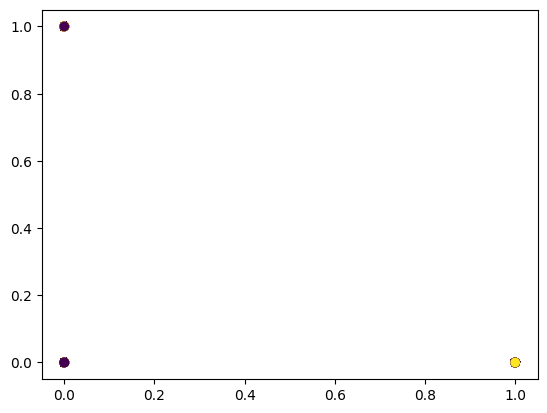

In [138]:
plt.scatter(X_c_vt[:,0], X_c_vt[:,1], c=y_c["Delay"]);

In [139]:
skb = SelectKBest(k=2)
X_skb = skb.fit_transform(X_r, y_r)
print(X_skb.shape)
test(X_skb, y_r)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(53794, 2)


c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.8561247612082519


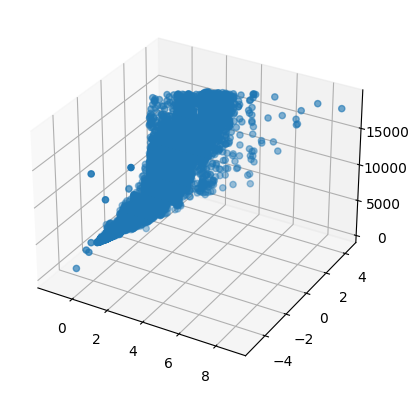

In [148]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -90)
ax.scatter(X_skb[:,0], X_skb[:,1], y_r);

In [149]:
skb_c = SelectKBest(k=2)
X_skb_c = skb_c.fit_transform(X_c, y_c)
print(X_skb_c.shape)
test2(X_skb_c, y_c)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(599119, 2)


c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.60      0.67      0.63     44743
           1       0.63      0.55      0.59     45125

    accuracy                           0.61     89868
   macro avg       0.61      0.61      0.61     89868
weighted avg       0.61      0.61      0.61     89868



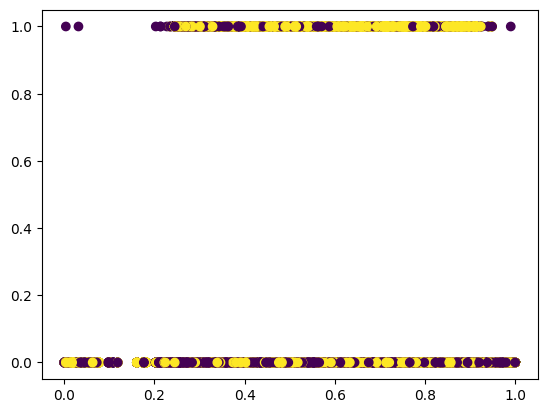

In [150]:
plt.scatter(X_skb_c[:,0], X_skb_c[:,1], c=y_c["Delay"]);

In [151]:
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier


tree = DecisionTreeRegressor().fit(X_r, y_r)
rfe = RFE(estimator=tree, n_features_to_select=2, step=1).fit(X_r, y_r)
X_rfe = pd.DataFrame(rfe.transform(X_r), columns=rfe.get_feature_names_out()) # type: ignore
test(X_rfe, y_r)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.8576833636844403


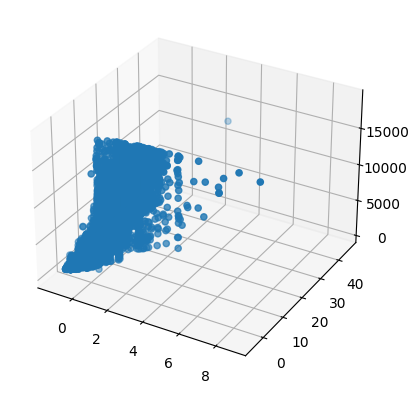

In [153]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -90)
ax.scatter(rfe.transform(X_r)[:,0], rfe.transform(X_r)[:,1], y_r);

In [155]:
tree_c = DecisionTreeClassifier().fit(X_c, y_c)

In [158]:
rfe_c = RFE(estimator=tree_c, n_features_to_select=2, step=50).fit(X_c, y_c)

In [159]:
X_rfe_c_x = rfe_c.transform(X_c)
X_rfe_c = pd.DataFrame(X_rfe_c_x, columns=rfe_c.get_feature_names_out()) # type: ignore

In [160]:
test2(X_rfe_c, y_c)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.72      0.71      0.71     44743
           1       0.72      0.73      0.72     45125

    accuracy                           0.72     89868
   macro avg       0.72      0.72      0.72     89868
weighted avg       0.72      0.72      0.72     89868



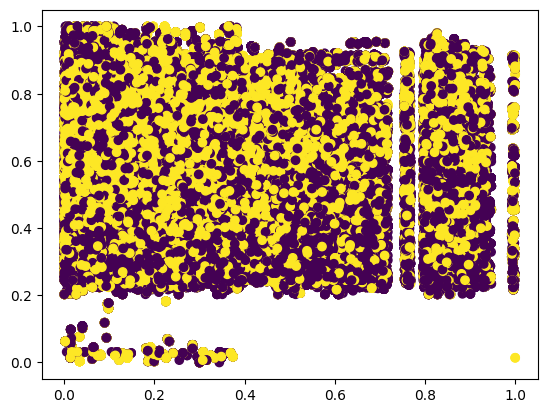

In [161]:
plt.scatter(X_rfe_c_x[:,0], X_rfe_c_x[:,1], c=y_c["Delay"]); # type: ignore

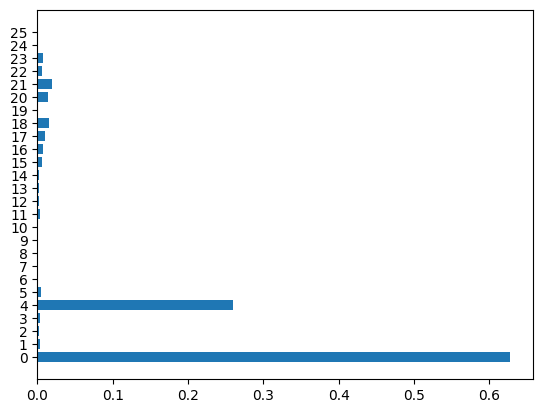

In [164]:
from matplotlib import pyplot as plt


plt.barh(width=tree.feature_importances_, y=X_r.columns);

In [182]:
print(tree.feature_importances_)

[6.27079679e-01 3.05157613e-03 2.36870319e-03 3.70879473e-03
 2.59844250e-01 5.02625921e-03 9.85908114e-05 2.37286674e-04
 1.11883569e-03 2.57517484e-04 2.35670102e-04 2.75517952e-03
 1.78496594e-03 1.70856244e-03 2.52570895e-03 5.79444569e-03
 7.65907976e-03 1.04328194e-02 1.52550892e-02 4.50784786e-04
 1.45778780e-02 1.93790657e-02 5.55199852e-03 7.38235725e-03
 4.48819345e-04 1.26608245e-03]


[['AL_OO' '0.003981451395081506']
 ['AL_DL' '0.0049169954137601515']
 ['AF_ORD' '0.005152730094889195']
 ['AT_ATL' '0.005357325851906988']
 ['AL_CO' '0.007761834823782169']
 ['AL_WN' '0.07340846122330746']
 ['DayOfWeek' '0.0963720245686186']
 ['Length' '0.13720544533021745']
 ['Flight' '0.14373064784850176']
 ['Time' '0.19218635646320487']]


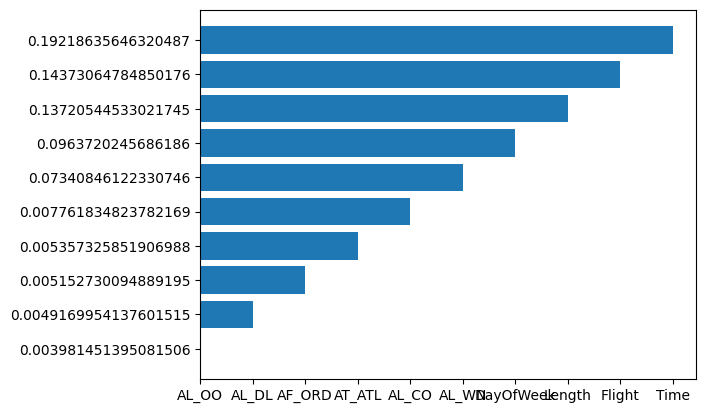

In [214]:
ls = [[i, j] for i, j in zip(tree_c.feature_importances_, X_c.columns)]
ls.sort(key=lambda x: x[0], reverse=True)
ls = np.flip(np.array(ls[:10]))
print(ls)
plt.barh(width=ls[:,0], y=ls[:,1]);

In [215]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_r, y_r)
X_pca.shape

(53794, 2)

In [216]:
sum(pca.explained_variance_ratio_)

0.24242921856170924

In [217]:
test(X_pca, y_r)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.7791894395115312


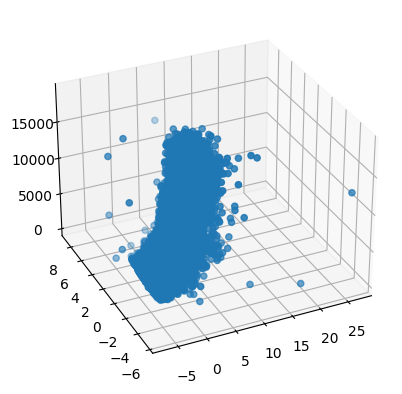

In [241]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -115)
ax.scatter(X_pca[:,0], X_pca[:,1], y_r);

In [242]:
pca_c = PCA(n_components=2)
X_pca_c = pca_c.fit_transform(X_c, y_c)
sum(pca_c.explained_variance_ratio_)

0.10555248740156938

In [243]:
test2(X_pca_c, y_c)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.84      0.74      0.79     44743
           1       0.77      0.86      0.81     45125

    accuracy                           0.80     89868
   macro avg       0.81      0.80      0.80     89868
weighted avg       0.81      0.80      0.80     89868



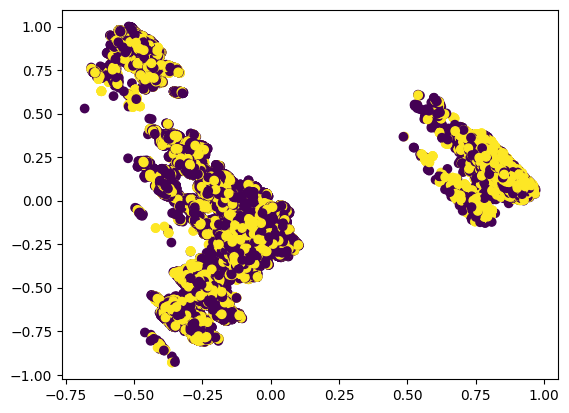

In [245]:
plt.scatter(X_pca_c[:,0], X_pca_c[:,1], c=y_c["Delay"]);

In [246]:
tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X_r)
test(X_tsne, y_r)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:508: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


0.9461488193245662


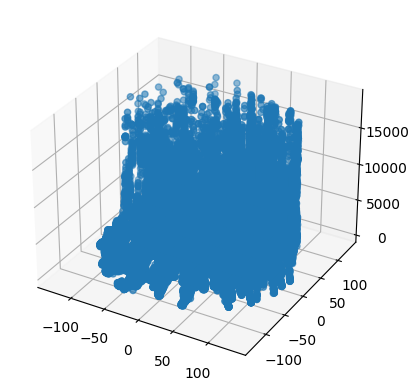

In [248]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -115)
ax.scatter(X_tsne[:,0], X_tsne[:,1], y_r);

In [249]:
tsne_c = TSNE(n_components=2)
X_tsne_c = tsne_c.fit_transform(X_c)
test2(X_tsne_c, y_c)

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.81      0.74      0.77     44743
           1       0.76      0.82      0.79     45125

    accuracy                           0.78     89868
   macro avg       0.78      0.78      0.78     89868
weighted avg       0.78      0.78      0.78     89868



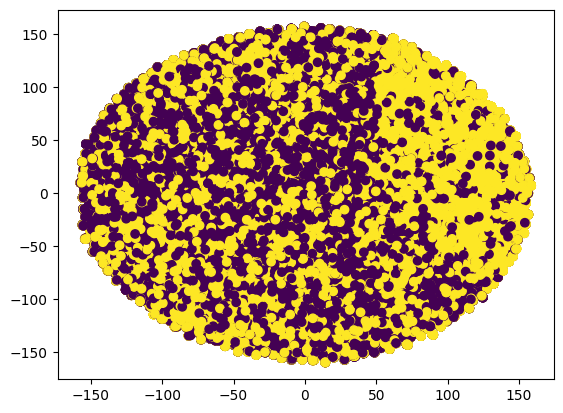

In [250]:
plt.scatter(X_tsne_c[:,0], X_tsne_c[:,1], c=y_c["Delay"]);

In [252]:
isomap = Isomap(n_components=2)
X_isomap = isomap.fit_transform(X_r[:10000])
test(X_isomap, y_r[:10000])

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\manifold\_isomap.py:373: UserWarning: The number of connected components of the neighbors graph is 124 > 1. Completing the graph to fit Isomap might be slow. Increase the number of neighbors to avoid this issue.
  self._fit_transform(X)
c:\OmSTU\Python\ml\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\OmSTU\Python\ml\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\OmSTU\Python\ml\venv\lib\site-packages\scipy\sparse\_index.py:103: SparseEfficiencyWarning: Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])
c:\OmSTU\Python\ml\venv\lib\s

0.558864396385597


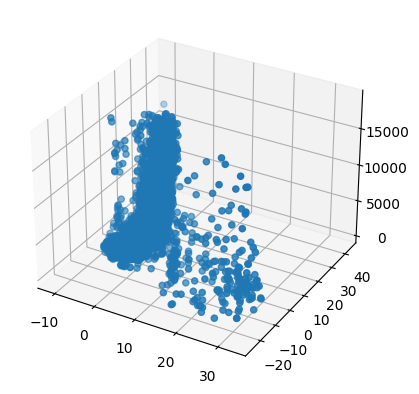

In [254]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -115)
ax.scatter(X_isomap[:,0][:10000], X_isomap[:,1][:10000], y_r[:10000]);

In [255]:
isomap_c = Isomap(n_components=2)
X_isomap_c = isomap_c.fit_transform(X_c[:10000])
test2(X_isomap_c[:10000], y_c[:10000])

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.55      0.61      0.58       754
           1       0.55      0.48      0.52       746

    accuracy                           0.55      1500
   macro avg       0.55      0.55      0.55      1500
weighted avg       0.55      0.55      0.55      1500



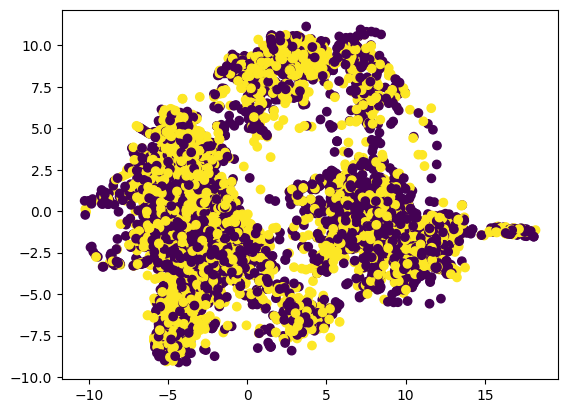

In [256]:
plt.scatter(X_isomap_c[:,0][:10000], X_isomap_c[:,1][:10000], c=y_c["Delay"][:10000]);

Самостоятельно реализуйте алгоритм PCA. Выполните с его помощью понижение размерности датасета для классификации до 2 (преобразуйте данные в двумерное пространство). Выполните визуализацию данных (точки на плоскости).

In [495]:
class PCA_new():
    def __init__(self, n_components):
        self.n_components = n_components
        self.matrix = np.zeros((1, 1))
    def fit(self, X):
        X_cov = np.cov(X)
        w, v = np.linalg.eig(X_cov)
        self.matrix = [(i, j) for i, j in zip(w, v)]
        self.matrix.sort(key=lambda x: x[0], reverse=True)
        self.matrix = np.array([i[1] for i in self.matrix[:]])[:self.n_components]
        return self
    def transform(self, X):
        basic = X @ (X.T @ self.matrix.T) 
        return basic
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X) # type: ignore

In [496]:
X_pcanew_c2 = PCA_new(2).fit_transform(X_c[:100])
X_pcanew_c3 = PCA_new(3).fit_transform(X_c[:100])

In [497]:
print(X_pcanew_c2.shape)

(100, 2)


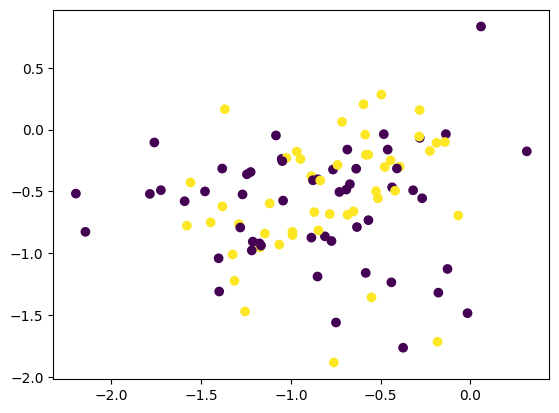

In [499]:
plt.scatter(X_pcanew_c2.loc[:,0], X_pcanew_c2.loc[:,1], c=y_c["Delay"][:100]);

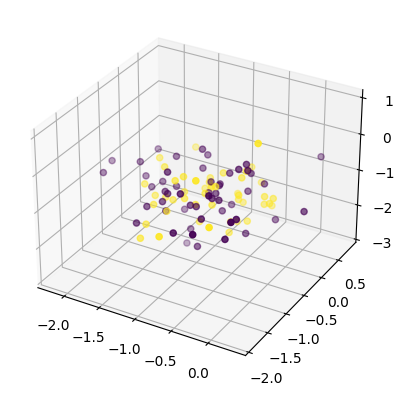

In [500]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#ax.view_init(30, -115)
ax.scatter(X_pcanew_c3.loc[:,0], X_pcanew_c3.loc[:,1], X_pcanew_c3.loc[:,2], c=y_c["Delay"][:100]);

c:\OmSTU\Python\ml\venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


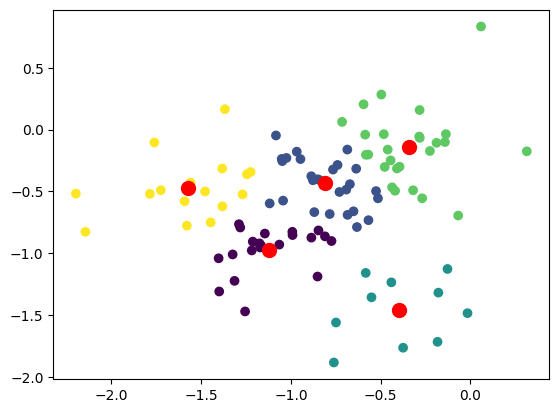

In [501]:
k = KMeans(5)
k.fit(X_pcanew_c2)
plt.scatter(X_pcanew_c2.loc[:,0], X_pcanew_c2.loc[:,1], c=k.labels_)
plt.scatter(k.cluster_centers_[:,0], k.cluster_centers_[:,1], s=100, c='red')

Используйте оригинальный датасет для регрессии (без понижения размерности). Обучите любую из линейных моделей, реализованных вами в ЛР1. Важно: модель должна быть реализована вами, не sklearn! Посмотрите значения коэффициентов модели, выберите несколько признаков с наибольшими значениями коэффициентов.

In [510]:
class LinLasso:
    def __init__(self):
        self.w = np.array([])
        self.y = np.array([])
        
    def fit(self, X, y, learning_rate = 0.0001, max_iter = 100, alpha = 1.):
        X = np.array(X)
        y = np.array(y)
        self.w = np.array([0 for i in range(X.shape[1])])
        self.w = np.append(self.w, 1)
        for t in range(max_iter):
            grad = np.array([])
            for i in range(X.shape[1]):
                grad = np.append(grad, (X[:, i]*(y - X.dot(self.w[:-1]) - self.w[-1])).sum() + alpha * self.w[i])
            grad = np.append(grad,(y - X.dot(self.w[:-1]) - self.w[-1]).sum() + alpha * self.w[-1])
            w_next = self.w - 2 * grad * learning_rate / len(X)
        self.w = w_next
        return self
    def predict(self, X):
        X = np.array(X)
        self.y = X.dot(self.w[:-1]) + self.w[-1]
        return self.y
    
l = LinLasso().fit(X_train_r[:1000], y_train_r[:1000])

In [512]:
l.w

array([ 5.86928828e+00,  4.02001502e+01,  1.35779138e+01,  5.89470458e+00,
        6.94460616e+00,  9.74094282e+00,  4.86652742e+01,  2.35030595e+01,
       -3.84059902e+01, -1.69810357e+01,  2.69715742e+01,  1.44665533e+01,
       -3.27273421e+01, -9.20794334e+00,  3.84888436e+01, -1.79678280e+01,
        6.95847570e+00,  1.48145373e-02,  1.28811307e+01, -2.20614226e-01,
        7.05441394e+01, -4.72349611e+01, -1.05315505e+01, -1.66929212e+01,
       -4.61822155e+00, -7.18373775e+00, -7.85429400e+02])

In [521]:
weights = enumerate(l.w)
weights = sorted(weights, key=lambda x: abs(x[1]), reverse=True)
weights

[(26, -785.4294002),
 (20, 70.54413942389189),
 (6, 48.66527418151977),
 (21, -47.23496105855294),
 (1, 40.20015023738797),
 (14, 38.488843624342756),
 (8, -38.40599017792544),
 (12, -32.72734205168741),
 (10, 26.97157421963616),
 (7, 23.503059499242664),
 (15, -17.967828045735075),
 (9, -16.981035695505504),
 (23, -16.692921177938043),
 (11, 14.46655331321259),
 (2, 13.577913798311295),
 (18, 12.881130728454208),
 (22, -10.531550471812881),
 (5, 9.740942818051858),
 (13, -9.207943337171889),
 (25, -7.183737748660808),
 (16, 6.958475700676927),
 (4, 6.9446061571338955),
 (3, 5.894704580536288),
 (0, 5.869288278230085),
 (24, -4.6182215549816465),
 (19, -0.22061422641251816),
 (17, 0.014814537260393218)]